# Модель AIDS на RLMS-HSE

## Загрузка библиотек

In [67]:
# Определим какая директория сейчас активная
import os 
os.getcwd()

'C:\\Users\\79618\\Documents\\GitHub\\RLMS_HSE\\Разделы'

В эту директорию будет осуществляться загрузка база данных и распаковка данных. 

In [239]:
import RLMS_HSE.reading as readrlms
from importlib import reload  # Python 3.4+
readrlms = reload(readrlms)


Здесь при каждой загрузке производится релоад для динамического написания модуля

In [71]:
import sys
sys.path

['C:\\Users\\79618\\Documents\\GitHub\\RLMS_HSE\\Разделы',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\79618\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']

Это пути поиска модулей

In [72]:
import pandas as pd
import pyreadstat #Для чтения файлов SPSS
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
#Нам нужен упорядоченный словарь для системы уравнений
from collections import OrderedDict
#Для оценки систем одновременных уравнений
from linearmodels.system import SUR
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.ticker as ticker
from sympy import *
import patsy
import numpy as np

In [73]:
plt.rcParams['axes.axisbelow'] = True

## Загрузка датасета с яндекс-диска

In [74]:
readrlms.download_rlms_db()

In [240]:
readrlms.read_wave_ind(2013,renaming=True)

Загружен 2013
Исправлен 2013


,idind,rredid_i,rid_i,rid_h,qid_i,qid_h,pid_i,pid_h,oid_i,oid_h,...,m109,m111,s1.1,s1.2,s2,s3,s4,s5,s6,s7
0,7.0,102301.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,102401.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.0,103301.0,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.0,103302.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.0,104602.0,1004702.0,10047.0,1004702.0,10047.0,1004702.0,10047.0,1004702.0,10047.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,50366.0,782604.0,161050604.0,1610506.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Нет,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
16083,50367.0,783604.0,161052404.0,1610524.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Нет,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",ЗАПИСАНО НЕДОСТАТОЧНО ИНФОРМАЦИИ
16084,50373.0,784702.0,161600302.0,1616003.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16085,51176.0,31604.0,117021504.0,1170215.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Нет,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ


## FAST-загрузчик полной панели волн исследований RLMS

In [111]:
readrlms.FAST_variable_hh()

Волны 1993 года не существует.
Загружен 1994
Загружен 1995
Загружен 1996
Волны 1997 года не существует.
Загружен 1998
Волны 1999 года не существует.
Загружен 2000
Загружен 2001
Загружен 2002
Загружен 2003
Загружен 2004
Загружен 2005
Загружен 2006
Загружен 2007
Загружен 2008
Загружен 2009
Загружен 2010
Загружен 2011
Загружен 2012
Загружен 2013
Загружен 2014
Загружен 2015
Загружен 2016
Загружен 2017
Загружен 2018
Загружен 2019
Загружен 2020
Загружен 2021


In [144]:
readrlms.FAST_variable_ind()

Волны 1993 года не существует.
Загружен 1994
Загружен 1995
Загружен 1996
Волны 1997 года не существует.
Загружен 1998
Волны 1999 года не существует.
Загружен 2000
Загружен 2001
Загружен 2002
Загружен 2003
Загружен 2004
Загружен 2005
Загружен 2006
Загружен 2007
Загружен 2008
Загружен 2009
Загружен 2010
Загружен 2011
Загружен 2012
Загружен 2013
Загружен 2014
Загружен 2015
Загружен 2016
Загружен 2017
Загружен 2018
Загружен 2019
Загружен 2020
Загружен 2021


### Пример работы FAST-панели данных

In [121]:
readrlms.FAST_HH_DFS

{1994:       aredid_h     aid_h                            a_origsm  a_hhwgt  \
 0          1.0    1001.0  Да, адрес репрезентативной выборки  1.04676   
 1          2.0    1002.0  Да, адрес репрезентативной выборки  1.02962   
 2          3.0    1003.0  Да, адрес репрезентативной выборки  1.00000   
 3          4.0    1004.0  Да, адрес репрезентативной выборки  1.00000   
 4          5.0    1005.0  Да, адрес репрезентативной выборки  1.04676   
 ...        ...       ...                                 ...      ...   
 3970    3971.0  160007.0  Да, адрес репрезентативной выборки  1.04676   
 3971    3972.0  160008.0  Да, адрес репрезентативной выборки  0.96299   
 3972    3973.0  160009.0  Да, адрес репрезентативной выборки  0.88844   
 3973    3974.0  160012.0  Да, адрес репрезентативной выборки  0.88844   
 3974    3975.0  160013.0  Да, адрес репрезентативной выборки  1.04676   
 
                                         region  \
 0     Ленинградская область, Волосовский район   
 1

In [145]:
readrlms.FAST_IND_DFS

{1994:          idind  aredid_i       aid_i     aid_h  \
 0          1.0     101.0    100101.0    1001.0   
 1          2.0     102.0    100102.0    1001.0   
 2          3.0     201.0    100201.0    1002.0   
 3          4.0     202.0    100202.0    1002.0   
 4          5.0     203.0    100203.0    1002.0   
 ...        ...       ...         ...       ...   
 11284  11289.0  397501.0  16001301.0  160013.0   
 11285  11290.0  397502.0  16001302.0  160013.0   
 11286  14360.0   66301.0   4501301.0   45013.0   
 11287  14362.0  186401.0   8001001.0   80010.0   
 11288  14365.0  263403.0  10606803.0  106068.0   
 
                                             a_origsm   a_inwgt  \
 0      Да, адрес репрезентативной выборки 5-ой волны  1.006194   
 1      Да, адрес репрезентативной выборки 5-ой волны  1.120193   
 2      Да, адрес репрезентативной выборки 5-ой волны  0.904263   
 3      Да, адрес репрезентативной выборки 5-ой волны  0.956155   
 4      Да, адрес репрезентативной выборки 5-

# Разработка AIDS-модели

In [ ]:
import RLMS_HSE.AIDS as aids
from importlib import reload  # Python 3.4+
aids = reload(aids)


## Отбор продуктов питания

Словарь кодов продуктов питания

In [60]:
food_codebook={'e1.1': 'белый хлеб, кг.',
 'e1.2': 'черный хлеб, кг.',
 'e1.3': 'рис, другая крупа, кг.',
 'e1.4': 'мука, кг.',
 'e1.5': 'макаронные изделия, кг.',
 'e1.6': 'картофель, кг.',
 'e1.7': 'овощные консервы, без солений, кг.',
 'e1.8': 'капуста, включая квашеную, кг.',
 'e1.9': 'огурцы, включая соленые, кг.',
 'e1.10': 'помидоры, включая соленые, кг.',
 'e1.11': 'свеклу, морковь и другие корнеплоды, кг.',
 'e1.12': 'лук, чеснок, кг.',
 'e1.13': 'кабачки, тыквы и тому подобное, кг.',
 'e1.14': 'другие овощи, кг.',
 'e1.15': 'арбузы, дыни, включая соленые и сушеные, кг.',
 'e1.16': 'фруктово-ягодные консервы, кг.',
 'e1.17': 'свежие ягоды, кг.',
 'e1.18': 'свежие фрукты, кг.',
 'e1.19': 'сушеные фрукты и ягоды, кг.',
 'e1.20': 'орехи, семечки, кг.',
 'e1.21': 'мясные консервы, кг.',
 'e1.22': 'говядина, телятина, кг.',
 'e1.23': 'баранина, козлятина, кг.',
 'e1.24': 'свинина, кг.',
 'e1.25': 'субпродукты: печень, почки, кг.',
 'e1.26': 'птица, кг.',
 'e1.27': 'сало, другие животные жиры, кг.',
 'e1.28': 'колбасные изделия, копчености, кг.',
 'e1.29': 'мясных полуфабрикатов, кг.',
 'e1.30': 'молочные консервы, сухое молоко, кг.',
 'e1.31': 'молока, кроме сухого, л.',
 'e1.32': 'кисломолочные продукты: кефир, йогурт и другие, л.',
 'e1.33': 'сметана, сливки, л.',
 'e1.34': 'масло животное, кг.',
 'e1.35': 'творог, сырковая масса, кг.',
 'e1.36': 'сыр, брынза, кг.',
 'e1.37': 'мороженое, кг.',
 'e1.38': 'масло растительное, л.',
 'e1.39': 'маргарин, кг.',
 'e1.40': 'сахар, кг.',
 'e1.41': 'конфеты, шоколад, кг.',
 'e1.42': 'варенье, джем, кг.',
 'e1.43': 'меда, л.',
 'e1.44': 'печенье, пирожные, торты, вафли, пряники, сдобные булочки, кг.',
 'e1.45': 'яица, шт.',
 'e1.46': 'рыба свежая, мороженая, соленая, сушеная, рыбные полуфабрикаты, кг.',
 'e1.47': 'рыбные консервы, кг.',
 'e1.58': 'морепродукты, кг.',
 'e1.59': 'полуфабрикаты, не считая мясных и рыбных, кг.',
 'e1.48': 'чай, кг.',
 'e1.49': 'кофе, кофейные напитки, какао, кг.',
 'e1.50': 'безалкогольные напитки, соки, л.',
 'e1.51': 'соль, другие специи, различные соусы, кг. ',
 'e1.52': 'грибы, кг.',
 'e1.53': 'водка, л.',
 'e1.54': 'вино, другие ликероводочные изделия, л.',
 'e1.55': 'пиво, л.',
 'e1.56': 'табачные изделия, пачек'}

# исключили 57 жевательные резинки, пастилки, шт.

### Рутины чистки данных

Здесь мы выделяем необходимые нам данные, а именно:
Расходы на выше оуказанные категории продуктов
Сумма расходов на продукты питания
Сумма расходов всего

In [36]:
#==============================================
def renaming_routine(df1,rename_del):
    if rename_del=='wave':
        for i in range(len(df1.columns)):
            df1.rename(columns={ df1.columns[i]: df1.columns[i][1:]}, inplace = True)
        return df1
    if rename_del=='quest':
        for i in range(len(df1.columns)):
            df1.rename(columns={ df1.columns[i]: df1.columns[i][:-1]}, inplace = True)
        return df1
#==============================================    
def renaming_routine_names(df1):
    df1=renaming_routine(df1,'wave')
    df1=renaming_routine(df1,'quest')
    df1.rename(columns=codebook,inplace=True)
    return df1

In [37]:
def cleaning_routine(dfvar_1,dfvar_2):
    bad_households1=[]
    for i in range(len(dfvar_1.columns)):
        ttt=dfvar_1.loc[dfvar_1.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households1=[*bad_households1,*list(ttt)]
    
    bad_households2=[]
    for i in range(len(dfvar_2.columns)):
        ttt=dfvar_2.loc[dfvar_2.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households2=[*bad_households2,*list(ttt)] 
            
    dfvar_1=dfvar_1.drop(list(set(bad_households1)|set(bad_households2))).copy()
    dfvar_1=dfvar_1.astype(str).replace('nan', '0').astype(float).copy()
    return dfvar_1

### Генератор фрейма данных продуктов питания

In [246]:
def food_df(year, variable, cleaned=True,rename_del=['wave','quest']):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {0} года не существует.'.format(year)
    df1=readrlms.read_wave_hh(year)
#=============================================================================    
    food_costs_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'c' in i[1:]:
                if '60' not in i[1:]:
                    if '57' not in i[1:]:
                        food_costs_cols.append(i)
    food_costs=df1.loc[:,food_costs_cols]
#=============================================================================          
    food_quant_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'b' in i[1:]:
                if '57' not in i[1:]:
                    food_quant_cols.append(i)
    food_quant=df1.loc[:,food_quant_cols]
#=============================================================================
    if 'wave' in rename_del:
        food_costs=renaming_routine(food_costs,'wave')
        food_quant=renaming_routine(food_quant,'wave')
    if 'quest' in rename_del:
        food_costs=renaming_routine(food_costs,'quest')
        food_quant=renaming_routine(food_quant,'quest')
    if rename_del=='names':
        food_costs=renaming_routine_names(food_costs)
        food_quant=renaming_routine_names(food_quant)
#=============================================================================    
    if cleaned==1:
        if variable=='costs' or variable=='cost':
            return cleaning_routine(food_costs,food_quant)
        if variable=='quants' or variable=='quant':
            return cleaning_routine(food_quant,food_costs)
        if variable=='prices' or variable=='price':
            if rename_del=='names':
                result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                result.replace([np.inf, -np.inf], np.nan, inplace=True)
                return result
            else:
                if 'quest' not in rename_del:
                    food_costs=renaming_routine(food_costs,'quest')
                    food_quant=renaming_routine(food_quant,'quest')
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
                else:
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
    else: 
        if variable=='costs' or variable=='cost':
            return food_costs
        if variable=='quants' or variable=='quant':
            return food_quant
        if variable=='prices' or variable=='price':
            return 'Невозможно получить индивидуальные цены без чистки данных'

In [247]:
food_df(2021,'costs')

Загружен 2021


,e1.1,e1.2,e1.3,e1.4,e1.5,e1.6,e1.7,e1.8,e1.9,e1.10,...,e1.59,e1.48,e1.49,e1.50,e1.51,e1.52,e1.53,e1.54,e1.55,e1.56
2,39.0,90.0,88.0,0.0,0.0,200.0,0.0,0.0,70.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,700.0,230.0,0.0,1040.0
4,52.0,56.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,41.0,38.0,81.0,0.0,0.0,600.0,68.0,0.0,74.0,101.0,...,0.0,0.0,260.0,0.0,0.0,0.0,0.0,0.0,0.0,280.0
6,21.0,36.0,0.0,0.0,0.0,40.0,60.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,70.0,44.0,59.0,0.0,0.0,0.0,0.0,0.0,40.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,280.0,400.0,0.0,70.0,120.0,200.0,0.0,80.0,150.0,0.0,...,0.0,70.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,1680.0
4834,245.0,80.0,160.0,200.0,108.0,2500.0,220.0,0.0,0.0,0.0,...,0.0,90.0,300.0,0.0,240.0,0.0,0.0,0.0,0.0,2000.0
4836,36.0,42.0,140.0,0.0,110.0,160.0,0.0,0.0,0.0,0.0,...,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4837,42.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,60.0,100.0,...,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Аналог для работы непосредственно с датафреймом

In [39]:
def food_df_from_df(df1, variable, cleaned=True,rename_del=['wave','quest']):

#=============================================================================    
    food_costs_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'c' in i[1:]:
                if '60' not in i[1:]:
                    if '57' not in i[1:]:
                        food_costs_cols.append(i)
    food_costs=df1.loc[:,food_costs_cols]
#=============================================================================          
    food_quant_cols=[]
    for i in df1.columns:
        if 'e1.' in (i[1:]):
            if 'b' in (i[1:]):
                if '57' not in i[1:]:
                    food_quant_cols.append(i)
    food_quant=df1.loc[:,food_quant_cols]
#=============================================================================
    if 'wave' in rename_del:
        food_costs=renaming_routine(food_costs,'wave')
        food_quant=renaming_routine(food_quant,'wave')
        
    if 'quest' in rename_del:
        food_costs=renaming_routine(food_costs,'quest')
        food_quant=renaming_routine(food_quant,'quest')
        
    if rename_del=='names':
        food_costs=renaming_routine_names(food_costs)
        food_quant=renaming_routine_names(food_quant)
        
#=============================================================================    
    if cleaned==1:
        if variable=='cost' or variable=='costs':
            return cleaning_routine(food_costs,food_quant)
        
        if variable=='quant' or variable=='quants':
            return cleaning_routine(food_quant,food_costs)
        
        if variable=='price' or variable=='prices':
            if rename_del=='names':
                result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                return result
            else:
                if 'quest' not in rename_del:
                    food_costs=renaming_routine(food_costs,'quest')
                    food_quant=renaming_routine(food_quant,'quest')
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    return result
                else:
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    return result
                    
            
    else: 
        if variable=='cost' or variable=='costs':
            return food_costs
        if variable=='quant' or variable=='quants':
            return food_quant
        if variable=='price' or variable=='prices':
            return 'Невозможно получить индивидуальные цены без чистки данных'

### FAST-аналог

In [40]:
def FAST_food_df(year, variable, cleaned=True,rename_del=['wave','quest'],del_zero=False,dem=False):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {0} года не существует.'.format(year)
    df1=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)


#=============================================================================    
    food_costs_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'c' in i[1:]:
                if '60' not in i[1:]:
                    if '57' not in i[1:]:
                        food_costs_cols.append(i)
    food_costs=df1.loc[:,food_costs_cols]
#=============================================================================          
    food_quant_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'b' in i[1:]:
                if '57' not in i[1:]:
                    food_quant_cols.append(i)
    food_quant=df1.loc[:,food_quant_cols]
#=============================================================================
    if 'wave' in rename_del:
        food_costs=renaming_routine(food_costs,'wave')
        food_quant=renaming_routine(food_quant,'wave')
        
    if 'quest' in rename_del:
        food_costs=renaming_routine(food_costs,'quest')
        food_quant=renaming_routine(food_quant,'quest')
        
    if rename_del=='names':
        food_costs=renaming_routine_names(food_costs)
        food_quant=renaming_routine_names(food_quant)
        
#=============================================================================    
    if cleaned==1:
        
        if variable=='costs' or variable=='cost':
            return cleaning_routine(food_costs,food_quant)
        
        if variable=='quants' or variable=='quant':
            return cleaning_routine(food_quant,food_costs)
        
        if variable=='prices' or variable=='price':
            if rename_del=='names':
                result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                result.replace([np.inf, -np.inf], np.nan, inplace=True)
                return result
            else:
                if 'quest' not in rename_del:
                    food_costs=renaming_routine(food_costs,'quest')
                    food_quant=renaming_routine(food_quant,'quest')
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
                else:
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
                
        
            
    else: 
        if variable=='costs' or variable=='cost':
            return food_costs
        if variable=='quants' or variable=='quant':
            return food_quant
        if variable=='prices' or variable=='price':
            return 'Невозможно получить индивидуальные цены без чистки данных'

#### Пример

In [41]:
FAST_HOUSEHOLDS_DFS=rlms.FAST_HH_DFS

In [44]:
FAST_food_df(2001,variable='price',cleaned=1,rename_del='names')

,"белый хлеб, кг.","черный хлеб, кг.","рис, другая крупа, кг.","мука, кг.","макаронные изделия, кг.","картофель, кг.","овощные консервы, без солений, кг.","капуста, включая квашеную, кг.","огурцы, включая соленые, кг.","помидоры, включая соленые, кг.",...,"рыбные консервы, кг.","чай, кг.","кофе, кофейные напитки, какао, кг.","безалкогольные напитки, соки, л.","соль, другие специи, различные соусы, кг.","грибы, кг.","водка, л.","вино, другие ликероводочные изделия, л.","пиво, л.","табачные изделия, пачек"
4,17.5,7.000000,NaN,7.666667,20.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,20.0,5.0
5,16.5,7.222222,8.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0
6,9.0,15.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500000,...,NaN,156.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12.0,6.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,25.333333,...,NaN,120.00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
9,13.0,6.300000,10.500000,10.500000,12.500000,NaN,NaN,NaN,NaN,NaN,...,42.857143,80.00,NaN,10.8,2.5,NaN,NaN,NaN,20.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,14.0,9.333333,15.000000,NaN,22.222222,NaN,NaN,NaN,NaN,NaN,...,NaN,60.00,1140.0,NaN,2.5,NaN,NaN,NaN,NaN,10.0
3510,8.4,8.000000,10.000000,8.500000,14.000000,5.5,NaN,5.0,NaN,20.000000,...,NaN,160.00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3512,12.0,16.071429,10.000000,6.000000,12.000000,5.0,NaN,NaN,NaN,NaN,...,NaN,140.00,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
3513,NaN,30.000000,11.111111,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.666667,NaN,NaN


In [45]:
FAST_food_df(2001,variable='cost',cleaned=0,rename_del='names')

,"белый хлеб, кг.","черный хлеб, кг.","рис, другая крупа, кг.","мука, кг.","макаронные изделия, кг.","картофель, кг.","овощные консервы, без солений, кг.","капуста, включая квашеную, кг.","огурцы, включая соленые, кг.","помидоры, включая соленые, кг.",...,"рыбные консервы, кг.","чай, кг.","кофе, кофейные напитки, какао, кг.","безалкогольные напитки, соки, л.","соль, другие специи, различные соусы, кг.","грибы, кг.","водка, л.","вино, другие ликероводочные изделия, л.","пиво, л.","табачные изделия, пачек"
0,39.2,21.8,13.0,NaN,8.8,NaN,NaN,NaN,NaN,NaN,...,NaN,14.0,NaN,16.0,NaN,NaN,NaN,NaN,60.0,40.0
1,78.4,42.0,NaN,NaN,27.0,100.0,NaN,NaN,NaN,NaN,...,NaN,9.8,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,NaN,NaN,NaN,NaN,NaN,84.0
2,10.6,6.4,9.6,NaN,NaN,32.0,NaN,3.0,NaN,NaN,...,NaN,NaN,52.6,NaN,5.0,NaN,NaN,NaN,NaN,NaN
3,33.0,18.0,12.0,14.5,NaN,44.0,NaN,6.0,NaN,45.0,...,NaN,NaN,84.0,NaN,NaN,NaN,200.0,NaN,50.0,42.0
4,21.0,10.5,NaN,92.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,50.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,NaN,18.0,10.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN
3514,24.0,30.0,NaN,NaN,30.0,52.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,NaN,NaN,NaN,...,NaN,12.0,NaN,10.0,3.0,NaN,NaN,100.0,75.0,77.0
3515,NaN,5.0,NaN,NaN,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
3516,NaN,17.0,48.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,50.0,16.0,NaN


## Плоттинг RLMS-HSE

In [46]:
name_dict={'prices':'Цена за товар',
           'price':'Цена за товар',
           'quant':'Количество товара',
           'quants':'Количество товара',
           'cost':'Затраты на товар',
           'cost':'Затраты на товар'}

### Генератор графика точек  (по регионам)

In [47]:
def region_plot(year, variable, plot_num='all',date_fr=False, fast=False):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    if fast==True:
        df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
        df_plot=food_df_from_df(df_all,variable)
    else:
        df_all=download_wave_hh(year)
        df_plot=food_df_from_df(df_all,variable)
    region_dict={}
    for i in df_all.region.cat.categories:
        region_dict[i]=list(df_all.loc[df_all['region'] == i].index)

    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 10), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.region.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 10), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.region.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

#### Пример

In [48]:
download_wave_hh=rlms.download_wave_hh

In [49]:
region_plot(2021, "price", 2)

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'C:\\Users\\user\\Desktop\\Saved\\Репрезентативная выборка 06.09.2022\\30-я волна\\ДОМОХОЗЯЙСТВА'

### Аналог для работы непосредственно с датафреймом

In [34]:
def region_plot_from_df(df_all, variable, plot_num='all'):
    df_plot=food_df_from_df(df_all,variable)
    region_dict={}
    for i in df_all.region.cat.categories:
        region_dict[i]=list(df_all.loc[df_all['region'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 10), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.region.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.region.cat.categories[i]+': '+str(len(good_index),s=20))
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 10), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.region.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

### Генератор графика точек (по типу поселения)

In [35]:
def status_plot(year, variable, plot_num='all',fast=False):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    if fast==True:
        df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
        df_plot=food_df_from_df(df_all,variable)
    else:
        df_all=download_wave_hh(year)
        df_plot=food_df_from_df(df_all,variable)
    status_dict={}
    for i in df_all.status.cat.categories:
        status_dict[i]=list(df_all.loc[df_all['status'] == i].index)
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.status.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.25, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 6), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.status.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.40, 1),title="Типов поселения: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

#### Пример

In [ ]:
status_plot(1998, variable='cost', plot_num=0)

In [ ]:
status_plot(1996, variable='price', plot_num=10)

### Аналог для работы непосредственно с датафреймом

In [38]:
def status_plot_from_df(df_all, variable, plot_num='all',zero_included=True):
    df_plot=food_df_from_df(df_all,variable)
    status_dict={}
    for i in df_all.status.cat.categories:
        status_dict[i]=list(df_all.loc[df_all['status'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.status.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 6), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.status.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Типов поселения: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

### FAST-аналоги

In [33]:
def FAST_region_plot(year, variable, plot_num='all'):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
    df_plot=food_df_from_df(df_all,variable)
    
    region_dict={}
    for i in df_all.region.cat.categories:
        region_dict[i]=list(df_all.loc[df_all['region'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 10), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.region.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 10), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.region.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

In [34]:
def FAST_status_plot(year, variable, plot_num='all'):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
    df_plot=food_df_from_df(df_all,variable)

    status_dict={}
    for i in df_all.status.cat.categories:
        status_dict[i]=list(df_all.loc[df_all['status'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.status.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.25, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 6), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.status.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.40, 1),title="Типов поселения: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

#### Примеры

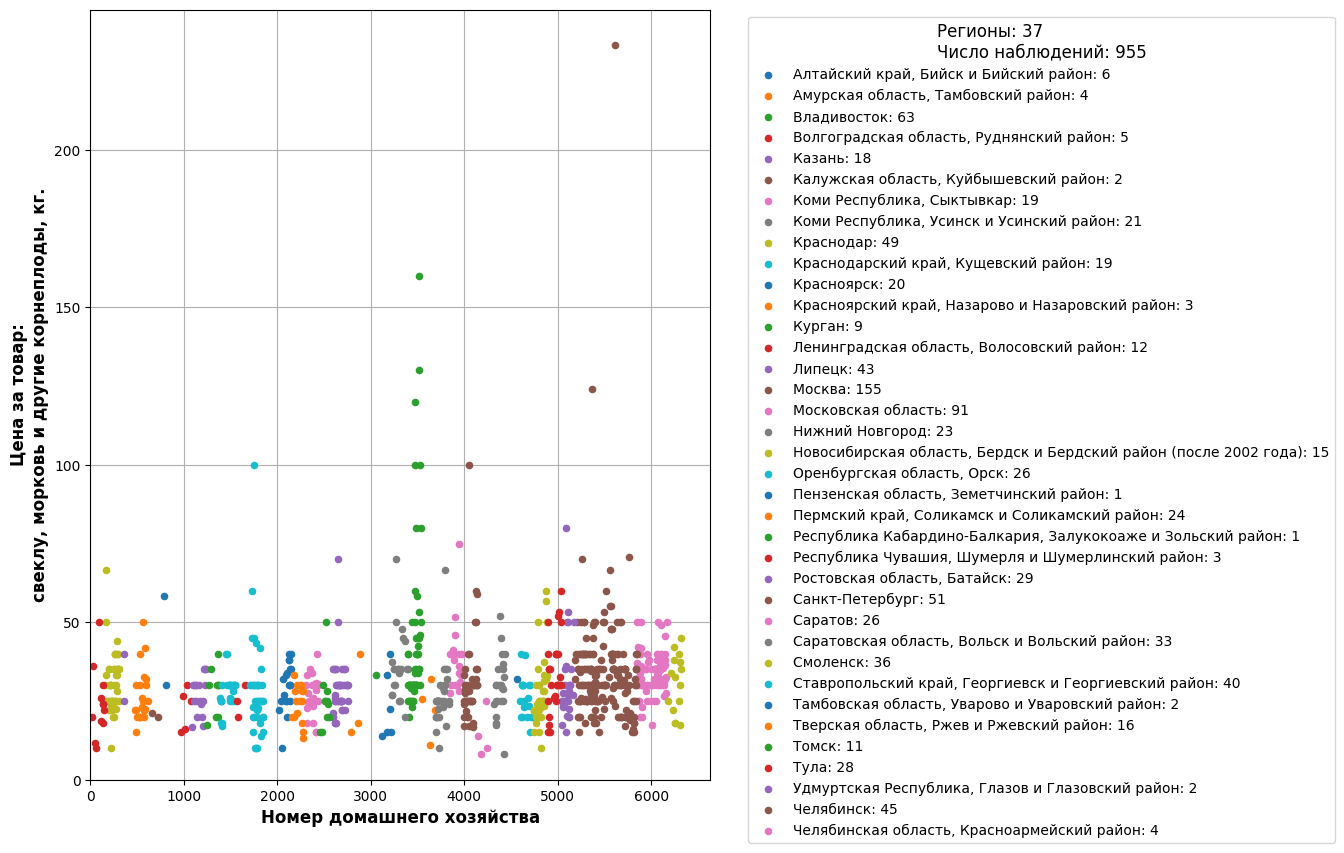

In [35]:
FAST_region_plot(2010, 'price', 10)

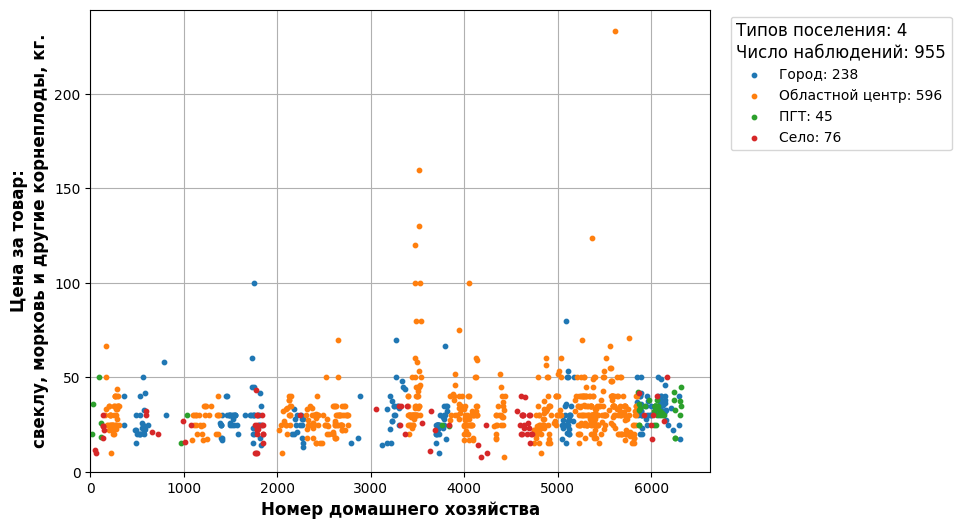

In [36]:
FAST_status_plot(2010, 'price', 10)

## Межпериодный фильтр на одинаковые домохозяйства
(Для работы с панельными данными)

In [43]:
def cross_period_household_filter(period):
    dict_hh=download_period(period)
    good_hh=set()
    good_hh=set(dict_hh[list(dict_hh.keys())[0]].iloc[:,0])
    for i in list(dict_hh.keys())[:-1]:
        good_hh=set(good_hh)&set(dict_hh[i+1].iloc[:,0])
    good_hh=list(good_hh)
    for i in dict_hh.keys():
        dict_hh[i]=dict_hh[i].loc[dict_hh[i].iloc[:,0].isin(good_hh)]
    return dict_hh

### Примеры

In [44]:
ex=cross_period_household_filter([2011,2012])

NameError: name 'download_period' is not defined

In [ ]:
ex[2012]

### FAST-аналог

In [47]:
FAST_download_period=download_wave_hh

In [48]:
def FAST_cross_period_household_filter(period):
    dict_hh=FAST_download_period(period)
    good_hh=set()
    good_hh=set(dict_hh[list(dict_hh.keys())[0]].iloc[:,0])
    for i in list(dict_hh.keys())[:-1]:
        good_hh=set(good_hh)&set(dict_hh[i+1].iloc[:,0])
    good_hh=list(good_hh)
    for i in dict_hh.keys():
        dict_hh[i]=dict_hh[i].loc[dict_hh[i].iloc[:,0].isin(good_hh)]
    return dict_hh

#### Пример

In [49]:
FAST_cross_period_household_filter([2011,2012,2013,2014])[2011]

TypeError: '<' not supported between instances of 'list' and 'int'

## Агрегирование товаров в широкие категории

In [37]:
Bondarev_dict={'Бакалея':[1, 2, 3, 4, 5, 51],
               'Овощи-фрукты': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 52, 59],
               'Мясо-рыба':[21, 22, 23, 24, 25, 26, 27, 28, 29, 46, 47, 58],
               'Молоко':[30, 31, 32, 33, 34, 35, 36, 38, 39, 45],
               'Кондитерские изделия':[37, 40, 41, 42, 43, 44],
               'Алкоголь':[53, 54, 55, 56],
               'Неалкогольные напитки':[48, 49, 50]
}

### Функция, возвращающая фрейм данных агрегатов

In [40]:
def food_agregates(year, variable, style_of_agregation='Bondarev',total=False,del_zero=False):
    if style_of_agregation=='Bondarev':
        agr_dict=Bondarev_dict
    f_agr=FAST_food_df(year, variable,cleaned=True)
    for i in agr_dict.keys():
        f_agr[i]=0
    for i in agr_dict.keys():
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_agr.columns):
                continue
            f_agr[i]=f_agr[i]+f_agr['e1.{0}'.format(j)]
    f_agr=f_agr.loc[:,list(agr_dict.keys())]
    
    if del_zero==True:
        f_agr=f_agr[-(f_agr.sum(axis=1)==0)]
        f_agr=f_agr[-(f_agr==0).any(axis=1)]
    
    if total==True:
        f_agr['Сумма']=f_agr.sum(axis=1)
    return f_agr

#### Примеры

In [41]:
food_agregates(2012,'costs')

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки
3,10.4,0.0,46.0,83.0,0.0,0.0,0.0
4,46.0,224.0,605.0,270.0,145.0,300.0,0.0
5,60.0,70.0,330.0,141.0,257.0,360.0,0.0
9,15.0,242.0,450.0,206.0,0.0,0.0,100.0
10,644.0,1490.0,1990.0,1031.0,442.0,250.0,125.0
...,...,...,...,...,...,...,...
6510,377.8,676.6,1497.0,460.6,307.0,0.0,182.0
6511,478.0,142.0,1874.0,507.0,345.0,141.0,210.0
6512,280.0,435.0,5550.0,450.0,250.0,300.0,130.0
6513,175.0,0.0,409.0,139.0,340.0,132.0,278.0


In [42]:
food_agregates(2012,'costs',del_zero=1)

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки
10,644.0,1490.0,1990.0,1031.0,442.0,250.0,125.0
16,180.0,470.0,1395.0,754.0,36.0,245.0,332.0
23,373.0,136.0,420.0,537.0,265.0,870.0,54.0
25,366.0,612.0,902.0,1284.0,259.0,510.0,178.0
27,169.0,55.0,474.0,138.0,74.0,300.0,48.0
...,...,...,...,...,...,...,...
6503,90.4,115.0,964.8,224.5,137.6,116.0,49.9
6504,206.0,562.0,850.0,300.7,269.8,630.0,163.0
6506,242.6,378.8,580.0,680.5,120.2,270.0,128.8
6511,478.0,142.0,1874.0,507.0,345.0,141.0,210.0


### Функция, возвращающая фрейм данных долей агрегатов

In [43]:
def food_agregates_shares(year,del_zero=False):
    f_sh=food_agregates(year,'costs',total=1)

    f_sh=(f_sh.loc[:,f_sh.columns[0]:f_sh.columns[-1]]).div(f_sh.loc[:,f_sh.columns[-1]], axis='index')
    
    if del_zero==True:
        f_sh=f_sh[-(f_sh.sum(axis=1)==0)]
        f_sh=f_sh[-(f_sh==0).any(axis=1)]
    return f_sh

#### Примеры

In [44]:
food_agregates_shares(2012,'costs')

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки,Сумма
3,0.074605,0.000000,0.329986,0.595409,0.000000,0.000000,0.000000,1.0
4,0.028931,0.140881,0.380503,0.169811,0.091195,0.188679,0.000000,1.0
5,0.049261,0.057471,0.270936,0.115764,0.211002,0.295567,0.000000,1.0
9,0.014808,0.238894,0.444225,0.203356,0.000000,0.000000,0.098717,1.0
10,0.107837,0.249498,0.333222,0.172639,0.074012,0.041862,0.020931,1.0
...,...,...,...,...,...,...,...,...
6510,0.107912,0.193259,0.427592,0.131562,0.087689,0.000000,0.051985,1.0
6511,0.129294,0.038410,0.506897,0.137138,0.093319,0.038139,0.056803,1.0
6512,0.037863,0.058824,0.750507,0.060852,0.033807,0.040568,0.017579,1.0
6513,0.118805,0.000000,0.277665,0.094365,0.230821,0.089613,0.188730,1.0


In [45]:
food_agregates_shares(2005,del_zero=1)

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки,Сумма
2,0.073232,0.102213,0.392646,0.124026,0.174509,0.089748,0.043627,1.0
25,0.083538,0.054054,0.384111,0.187551,0.190827,0.086814,0.013104,1.0
26,0.244220,0.030347,0.420520,0.030347,0.043353,0.101156,0.130058,1.0
30,0.093047,0.056685,0.177532,0.130723,0.029684,0.496347,0.015984,1.0
31,0.103864,0.070567,0.428885,0.143875,0.056865,0.117841,0.078104,1.0
...,...,...,...,...,...,...,...,...
3138,0.034109,0.142799,0.246345,0.217380,0.152274,0.172577,0.034515,1.0
3144,0.216319,0.063567,0.308349,0.094877,0.074953,0.175522,0.066414,1.0
3145,0.050633,0.217137,0.368062,0.134372,0.077897,0.038948,0.112950,1.0
3151,0.030204,0.146580,0.310927,0.041457,0.174711,0.236897,0.059224,1.0


### FAST-аналоги

In [46]:
def FAST_food_agregates(year, variable, style_of_agregation='Bondarev',total=False,del_zero=False):
    if style_of_agregation=='Bondarev':
        agr_dict=Bondarev_dict
    f_agr=FAST_food_df(year, variable,cleaned=True)
    for i in agr_dict.keys():
        f_agr[i]=0
    if variable=='prices':
        for j in agr_dict[i]:
            return FAST_food_agregate_price(year)
    for i in agr_dict.keys():
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_agr.columns):
                continue
            f_agr[i]=f_agr[i]+f_agr['e1.{0}'.format(j)]
    f_agr=f_agr.loc[:,list(agr_dict.keys())]
    if del_zero==True:
        f_agr=f_agr[-(f_agr.sum(axis=1)==0)]
        f_agr=f_agr[-(f_agr==0).any(axis=1)]
    if total==True:
        f_agr['Сумма']=f_agr.sum(axis=1)
    return f_agr

In [47]:
def FAST_food_agregates_shares(year,del_zero=False,total=True):
    f_sh=FAST_food_agregates(year,'costs',total=1)
#     f_sh=(f_sh.loc[:,f_sh.columns[0]:f_sh.columns[-1]]).div(f_sh.columns[-1], axis='index')
#     f_sh=(f_sh.loc[:,'Бакалея':'Сумма']).div(f_sh['Сумма'], axis='index')
    f_sh=(f_sh.loc[:,f_sh.columns[0]:f_sh.columns[-1]]).div(f_sh.loc[:,f_sh.columns[-1]], axis='index')
    if del_zero==True:
        f_sh=f_sh[-(f_sh.sum(axis=1)==0)]
        f_sh=f_sh[-(f_sh==0).any(axis=1)]
    if total==False:
        f_sh=f_sh.iloc[:,:-1]
    return f_sh

#### Примеры

In [48]:
FAST_food_agregates(2012,'cost',del_zero=1)

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки
10,644.0,1490.0,1990.0,1031.0,442.0,250.0,125.0
16,180.0,470.0,1395.0,754.0,36.0,245.0,332.0
23,373.0,136.0,420.0,537.0,265.0,870.0,54.0
25,366.0,612.0,902.0,1284.0,259.0,510.0,178.0
27,169.0,55.0,474.0,138.0,74.0,300.0,48.0
...,...,...,...,...,...,...,...
6503,90.4,115.0,964.8,224.5,137.6,116.0,49.9
6504,206.0,562.0,850.0,300.7,269.8,630.0,163.0
6506,242.6,378.8,580.0,680.5,120.2,270.0,128.8
6511,478.0,142.0,1874.0,507.0,345.0,141.0,210.0


In [49]:
FAST_food_agregates_shares(2012,del_zero=1)

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки,Сумма
10,0.107837,0.249498,0.333222,0.172639,0.074012,0.041862,0.020931,1.0
16,0.052755,0.137749,0.408851,0.220985,0.010551,0.071805,0.097304,1.0
23,0.140490,0.051224,0.158192,0.202260,0.099812,0.327684,0.020339,1.0
25,0.089029,0.148869,0.219411,0.312333,0.063002,0.124057,0.043298,1.0
27,0.134340,0.043720,0.376789,0.109698,0.058824,0.238474,0.038156,1.0
...,...,...,...,...,...,...,...,...
6503,0.053233,0.067719,0.568131,0.132199,0.081027,0.068308,0.029384,1.0
6504,0.069093,0.188496,0.285091,0.100855,0.090491,0.211303,0.054670,1.0
6506,0.101045,0.157774,0.241576,0.283435,0.050065,0.112458,0.053647,1.0
6511,0.129294,0.038410,0.506897,0.137138,0.093319,0.038139,0.056803,1.0


## Статистика чистки

In [50]:
# Чистка от "Нет ответа"
# Чистка от "Затрудняюсь ответить"
# Чистка от нулевых сумм
# Чистка от нулевых агргегатов

In [51]:
def FAST_food_cleaning_counter(period,variables=['ЧИСЛО НАБЛЮДЕНИЙ','НЕТ ОТВЕТА',
                                                  'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                                  'НУЛЕВЫЕ АГРЕГАТЫ' ], result='dict'):
    df_dict=FAST_download_period(period)
    count_dft=pd.DataFrame(columns=period, index=[ *variables])
    count_dict={k:None for k in period}
    for i in period:
        count_dict[i]={l:None for l in variables}
        for j in variables:

#=============================================================================================================            
            if j=='ЧИСЛО НАБЛЮДЕНИЙ':
                count_dft.loc[j,i]=len(df_dict[i].index)
                (count_dict[i])[j]=len(df_dict[i].index)
#=============================================================================================================                 
            if j=='НЕТ ОТВЕТА':
#                 count_dft.loc[j,i]=FAST_food_df(i)
                
                len_no_answer=0
                set_1_2=[]
                
                for k in ['НЕТ ОТВЕТА',' НЕТ ОТВЕТА','НЕТ ОТВЕТА+E7898','нет ответа','ОТКАЗ ОТ ОТВЕТА']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                (count_dict[i])[j]=set_1_2
#=============================================================================================================              
            if j=='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':
#                 count_dft.loc[j,i]=FAST_food_df(i)
                
                len_dont_know=0
                set_1_2=[]
                for k in [' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                (count_dict[i])[j]=set_1_2
#=============================================================================================================
            if j=='НЕТ ОТВЕТА И ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':
                len_no_answer_and_dont_know=0
                set_1_2=[]
                
                len_no_answer=0
                set_1_2_no_answer=[]
                set_1_2_dont_know=[]
        
                for k in ['НЕТ ОТВЕТА',' НЕТ ОТВЕТА','НЕТ ОТВЕТА+E7898','нет ответа','ОТКАЗ ОТ ОТВЕТА']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                set_1_2_no_answer=set_1_2
                
                len_dont_know=0
                set_1_2=[]
                for k in [' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                set_result=list(set(set_1_2_dont_know) | set(set_1_2_no_answer))
                
                (count_dict[i])[j]=set_result

#============================================================================================================= 
            if j=='НУЛЕВЫЕ АГРЕГАТЫ':
                set_0_agregates=list(FAST_food_agregates(i,'costs',total=False)[(FAST_food_agregates(i,'costs',total=False)==0).any(axis=1)].index)
                (count_dict[i])[j]=set_0_agregates
#=============================================================================================================
            

    
#=============================================================================================================        
    if result=='dict':
        return count_dict
    if result=='df':
        for i in period:
            all_indexes=[]
            for j in list(set(variables)-set(['ЧИСЛО НАБЛЮДЕНИЙ'])):
                all_indexes=set(all_indexes)|set(count_dict[i][j])

#=============================================================================================================
            for j in list(set(variables)-set(['ЧИСЛО НАБЛЮДЕНИЙ'])):
                unique_del1=all_indexes-set(count_dict[i][j])
                unique_del2=all_indexes-unique_del1
                unique_del2=list(unique_del2)
                count_dft.loc[j,i]=len(unique_del2)
#=============================================================================================================                
            resid_set=count_dict[i]['ЧИСЛО НАБЛЮДЕНИЙ']-len(list(all_indexes))
            count_dft.loc['ОСТАЛОСЬ НАБЛЮДЕНИЙ',i]=resid_set
            


        return count_dft

### Пример

In [55]:
FAST_food_cleaning_counter([2012,2013,2014],result='df')

TypeError: 'NoneType' object is not subscriptable

## Получение фрейма агрегированных цен

In [56]:
Bondarev_dict

{'Бакалея': [1, 2, 3, 4, 5, 51],
 'Овощи-фрукты': [6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  52,
  59],
 'Мясо-рыба': [21, 22, 23, 24, 25, 26, 27, 28, 29, 46, 47, 58],
 'Молоко': [30, 31, 32, 33, 34, 35, 36, 38, 39, 45],
 'Кондитерские изделия': [37, 40, 41, 42, 43, 44],
 'Алкоголь': [53, 54, 55, 56],
 'Неалкогольные напитки': [48, 49, 50]}

### Датафрейм агрегированных цен

In [65]:
def FAST_food_agregate_price(year,style_of_agregation='Bondarev',good_price_names=False):
    if style_of_agregation=='Bondarev':
        agr_dict=Bondarev_dict
    f_food=FAST_food_df(year, 'costs',cleaned=True).loc[(FAST_food_agregates(year, "costs",del_zero=1).index)]
    f_price=FAST_food_df(year, 'prices',cleaned=True).loc[(FAST_food_agregates(year, "costs",del_zero=1).index)]
    f_agr=FAST_food_agregates(year, "costs",del_zero=1)
    f_agr_P=f_agr.copy(deep=1)
    f_shares=f_food.copy(deep=1)
    for i in agr_dict.keys():
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_food.columns):
                continue
            f_shares.loc[:,'e1.{0}'.format(j)]=(f_food.loc[:,'e1.{0}'.format(j)]).div(f_agr.loc[:,i],axis='index')
    f_agr_price=(f_shares*f_price).fillna(0)
    for i in agr_dict.keys():
        q=0
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_food.columns):
                continue
            q=q+f_agr_price.loc[:,'e1.{0}'.format(j)]
        f_agr_P.loc[:,i]=q
    if good_price_names==True:
        for i in f_agr_P.columns:
            f_agr_P=f_agr_P.rename({i : 'Цена на {0}'.format(i)},axis=1)
    return f_agr_P

### Пример

In [66]:
FAST_food_agregate_price(2012)

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки
10,32.544292,55.257271,145.977967,105.312184,129.981900,25.000000,250.000000
16,29.927160,43.617021,254.086022,162.037135,36.000000,35.000000,2388.915663
23,50.721180,302.941176,473.571429,86.984668,202.358491,188.068966,54.000000
25,38.299313,127.882353,166.527716,99.985981,70.921493,30.000000,377.583074
27,34.859303,55.000000,197.848101,71.111111,246.666667,30.000000,160.000000
...,...,...,...,...,...,...,...
6503,31.305942,71.826746,160.588486,100.228174,139.406202,38.666667,499.000000
6504,50.662621,88.312179,196.015357,112.539269,299.140676,576.734694,316.939042
6506,37.935738,99.074075,179.932684,142.053886,132.792346,27.000000,209.434550
6511,28.855033,90.345070,154.924658,40.923471,101.630435,48.191489,242.419048


In [67]:
FAST_food_agregate_price(2018)

,Бакалея,Овощи-фрукты,Мясо-рыба,Молоко,Кондитерские изделия,Алкоголь,Неалкогольные напитки
33,41.835821,58.478788,185.407407,235.202445,27.000000,130.000000,476.405229
36,116.100168,146.000000,313.627192,145.253270,280.000000,50.000000,1894.736842
37,109.896929,147.576464,324.014798,52.813663,210.000000,70.000000,70.000000
42,83.224135,114.871795,201.610473,390.458272,246.560629,115.000000,1561.813333
46,57.496203,94.000000,360.000000,62.771280,212.034068,106.000000,810.000000
...,...,...,...,...,...,...,...
4816,94.202703,61.190476,314.617368,269.597279,248.476265,520.000000,1400.000000
4817,112.500000,496.296296,356.937535,286.160550,190.000000,177.559524,1220.655738
4821,74.340000,138.805302,737.955052,369.772146,830.628743,483.589744,140.000000
4824,69.480519,75.000000,252.736549,180.511273,280.000000,481.111111,1136.363636


# Получение индексов цен

## Индекс цен Стоуна

In [68]:
def FAST_stone_price_index(year):
    return ((FAST_food_agregates_shares(year,del_zero=1,total=0)) * np.log(FAST_food_agregate_price(year))).sum(axis=1)

## Индекс цен Ласпейреса

In [69]:
def FAST_Laspeyres_price_index(year):
    return (FAST_food_agregates_shares(year,del_zero=1,total=0).mean()*np.log(FAST_food_agregate_price(year))).sum(axis=1)

In [70]:
def FAST_norm_stone_price_index(year):
    return ((FAST_food_agregates_shares(year,del_zero=1,total=0)) * np.log(FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean()))).sum(axis=1)

In [ ]:
FAST_norm_stone_price_index(2021)

In [ ]:
FAST_stone_price_index(2012)

## Индекс цен Пааше

# Получение матрицы переменных, пригодной к AIDS-оценке

## Получение конечной матрицы

In [ ]:
def FAST_AIDS_matrix(year,price_index='Stone',add_index=False):
    aids_shares=FAST_food_agregates_shares(year,del_zero=True,total=0)
    aids_prices=np.log(FAST_food_agregate_price(year,good_price_names=1))
    
    if price_index=='Stone':
        aids_resid=pd.DataFrame(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])-FAST_stone_price_index(year),columns=['Остаток'])
    if price_index=='norm Stone':
        aids_resid=pd.DataFrame(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])-FAST_norm_stone_price_index(year),columns=['Остаток'])
    if price_index=='Laspeyres':
        aids_resid=pd.DataFrame(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])-FAST_Laspeyres_price_index(year),columns=['Остаток'])
    
    result=aids_shares.join(aids_prices).join(aids_resid)
    if add_index==True:
        if price_index=='Stone':
            result['Расходы']=np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])
            result['Индекс']=FAST_stone_price_index(year)
        if price_index=='Laspeyres':
            result['Расходы']=np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])                        
            result['Индекс']=FAST_Laspeyres_price_index(year)
    result=sm.add_constant(result)
    return result

In [ ]:
FAST_AIDS_matrix(2021,add_index=True)

### Пример

In [ ]:
FAST_AIDS_matrix(2021)

In [ ]:
FAST_AIDS_matrix(year=1994,price_index='Laspeyres')

# Детекция выбросов

## Универсальный детектор

In [ ]:
def FAST_outlier_detection(year, variable='agregate_prices', n_neighbors=30, contamination='auto',output='df'):
    if variable=='agregate_prices' or variable=='agregate_price':
        X=FAST_food_agregate_price(year=year)

    if variable=='price' or variable=='prices':
        X=FAST_food_df(year=year, variable=variable, cleaned=1,rename_del='names',del_zero=True)
    
    ind=X.index
    X_final=X.copy(deep=1)
    
    clf = LocalOutlierFactor(n_neighbors=n_neighbors,contamination=contamination)
    for i in X.columns:
        Y=np.array(X[i]).reshape(-1, 1)
        out=clf.fit_predict(Y)
        X_final.loc[:,i]=pd.Series(out,index=ind)
          
    if output=='df':
        return X_final
    if output=='bad':
        return X_final[(X_final!=1).any(axis=1)].index
    if output=='good':
        return X_final[X_final!=-1].dropna().index
    if output=="good_df":
        return X.loc[X_final[X_final!=-1].dropna().index,:]
    if output=="bad_df":
        return X.loc[X_final[(X_final!=1).any(axis=1)].index,:]
    if output=="plot":
        for i in X.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            plt.grid()
            k=X.loc[X_final[X_final!=-1].dropna().index,:][i]
            k_bad=X.loc[X_final[(X_final!=1).any(axis=1)].index,:][i]
            plt.scatter(k.index,k,label='НЕвыбросы:'+str(len(k.index)),s = 10)
            plt.scatter(k_bad.index,k_bad,label='Выбросы:'+str(len(k_bad.index)),c='r',s = 10)
            plt.legend(bbox_to_anchor=(1, 1))
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            
            if variable=='agregate_prices':
                plt.ylabel('Цена на товар:\n{}'.format(i),fontsize='large',fontweight=700)

## Построения графиков для выбросов

In [ ]:
def food_price_outliers_plot(year,n_neighbors,good='all',contamination='auto'):
    X=FAST_food_df(year=year, variable='price', cleaned=1,rename_del='names',del_zero=True)
    ind=X.index
    X_final=X.copy(deep=1)
    X_dict={}
    
    clf = LocalOutlierFactor(n_neighbors=n_neighbors,contamination=contamination)
    for i in X.columns:
        Y=np.array(X[i].dropna()).reshape(-1, 1)
        out=clf.fit_predict(Y)
        X_dict[i]=pd.Series(out,index=X[i].dropna().index)
        
    if good=='all':  
   
        for i in X_dict.keys():
                plt.figure(figsize=(8, 6), dpi=100)
            
                k=X.loc[X_dict[i][(X_dict[i]==1)].index,:][i]
            
                k_bad=X.loc[X_dict[i][X_dict[i]==-1].index,:][i]
            
                plt.scatter(k.index,k,label='НЕвыбросы:'+str(len(k.index)),s = 10)
                plt.scatter(k_bad.index,k_bad,label='Выбросы:'+str(len(k_bad.index)),c='r',s = 10)
                plt.legend(bbox_to_anchor=(1, 1))
                plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
                plt.ylabel('Цена на товар:\n{}'.format(i),fontsize='large',fontweight=700)
                plt.grid()
    else:
        plt.figure(figsize=(8, 6), dpi=100)
        plt.grid(zorder=0)
        k=X.loc[X_dict[codebook['e1.{}'.format(good)]][(X_dict[codebook['e1.{}'.format(good)]]==1)].index,:][codebook['e1.{}'.format(good)]]
            
        k_bad=X.loc[X_dict[codebook['e1.{}'.format(good)]][X_dict[codebook['e1.{}'.format(good)]]==-1].index,:][codebook['e1.{}'.format(good)]]
            
        plt.scatter(k.index,k,label='НЕвыбросы:'+str(len(k.index)),s = 10,zorder=1)
        plt.scatter(k_bad.index,k_bad,label='Выбросы:'+str(len(k_bad.index)),c='r',s = 10,zorder=2)
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            
        plt.ylabel("Цена на товар:"+'\n'+str(codebook['e1.{}'.format(good)]),fontsize='large',fontweight=700)

## Примеры

In [ ]:
FAST_outlier_detection(2008, n_neighbors=30,output='plot')

In [ ]:
food_price_outliers_plot(2008,good=1,n_neighbors=700,contamination=0.015)

In [ ]:
FAST_outlier_detection(2008, n_neighbors=10,output='bad_df')

In [ ]:
FAST_outlier_detection(2018, n_neighbors=10,output='good_df')

In [ ]:
FAST_outlier_detection(1994, n_neighbors=10,output='df')

In [ ]:
FAST_outlier_detection(2000, n_neighbors=40,output='bad')

In [ ]:
FAST_outlier_detection(2008, n_neighbors=2,output='plot',contamination=0.05)

# SUR-оценка модели  AIDS

In [ ]:
def FAST_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto',homo=True, sym=True):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year=year,price_index=price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#7
#     equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    if constrained==True:
        if (homo==True) and (sym==True):
            mod=SUR(equations)
            mod.add_constraints(both_r)
        else:
            if homo==True:
                mod=SUR(equations)
                mod.add_constraints(homo_r)
            if sym==True:
                mod=SUR(equations)
                mod.add_constraints(sym_r)
        
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

## Примеры

In [ ]:
FAST_AIDS(2021,price_index='norm Stone')

In [ ]:
FAST_AIDS(2021,price_index='norm Stone',constrained=True)

In [ ]:
FAST_AIDS(2021,price_index='Stone')

In [ ]:
FAST_AIDS(2018, constrained=True,sym=False)

In [ ]:
FAST_AIDS(2018, constrained=True,homo=False)

In [ ]:
FAST_AIDS(2018, constrained=True)

In [ ]:
FAST_AIDS(2018,out=True,n_neighbors=70).likelihood_ratio()

In [ ]:
FAST_AIDS(2018)

In [ ]:
FAST_AIDS(2018,constrained=True,out=True,n_neighbors=70).likelihood_ratio()

In [ ]:
FAST_AIDS(2018).likelihood_ratio()

In [ ]:
FAST_AIDS(2018).resids.corr()

In [ ]:
FAST_AIDS(2018).sigma

In [ ]:
FAST_AIDS(2018).std_errors

In [ ]:
FAST_AIDS(2018).likelihood_ratio()

In [ ]:
FAST_AIDS(2018).breusch_pagan()

In [ ]:
FAST_AIDS(2018).fitted_values

In [ ]:
FAST_AIDS(2018).resids['Бакалея'].plot()

In [ ]:
FAST_AIDS(2018,out=True,n_neighbors=70).resids['Бакалея'].plot()

In [ ]:
FAST_AIDS(2018,out=True,constrained=True,n_neighbors=70,contamination=0.1).resids['Бакалея'].plot()

In [ ]:
FAST_AIDS(2018,out=True,constrained=True,n_neighbors=30,contamination=0.1).resids['Бакалея'].plot()

## Задание ограничения однородности

In [ ]:
homo = pd.DataFrame(
    columns=FAST_AIDS(1994,False).param_names,
    index=["rest{0}".format(i) for i in range(6)],
    dtype=np.float64)
homo_r=homo.fillna(0)

homo_r.loc['rest0',['Бакалея_Цена на Бакалея','Бакалея_Цена на Овощи-фрукты', 'Бакалея_Цена на Мясо-рыба','Бакалея_Цена на Молоко', 'Бакалея_Цена на Кондитерские изделия','Бакалея_Цена на Алкоголь', 'Бакалея_Цена на Неалкогольные напитки']]=1
homo_r.loc['rest1',['Овощи-фрукты_Цена на Бакалея','Овощи-фрукты_Цена на Овощи-фрукты', 'Овощи-фрукты_Цена на Мясо-рыба','Овощи-фрукты_Цена на Молоко','Овощи-фрукты_Цена на Кондитерские изделия','Овощи-фрукты_Цена на Алкоголь','Овощи-фрукты_Цена на Неалкогольные напитки']]=1     
homo_r.loc['rest2',['Мясо-рыба_Цена на Бакалея','Мясо-рыба_Цена на Овощи-фрукты', 'Мясо-рыба_Цена на Мясо-рыба','Мясо-рыба_Цена на Молоко', 'Мясо-рыба_Цена на Кондитерские изделия','Мясо-рыба_Цена на Алкоголь', 'Мясо-рыба_Цена на Неалкогольные напитки']]=1         
homo_r.loc['rest3',['Молоко_Цена на Бакалея','Молоко_Цена на Овощи-фрукты', 'Молоко_Цена на Мясо-рыба','Молоко_Цена на Молоко', 'Молоко_Цена на Кондитерские изделия','Молоко_Цена на Алкоголь', 'Молоко_Цена на Неалкогольные напитки']]=1             
homo_r.loc['rest4',['Кондитерские изделия_Цена на Бакалея','Кондитерские изделия_Цена на Овощи-фрукты','Кондитерские изделия_Цена на Мясо-рыба','Кондитерские изделия_Цена на Молоко','Кондитерские изделия_Цена на Кондитерские изделия','Кондитерские изделия_Цена на Алкоголь','Кондитерские изделия_Цена на Неалкогольные напитки']]=1              
homo_r.loc['rest5',['Алкоголь_Цена на Бакалея', 'Алкоголь_Цена на Овощи-фрукты','Алкоголь_Цена на Мясо-рыба', 'Алкоголь_Цена на Молоко','Алкоголь_Цена на Кондитерские изделия', 'Алкоголь_Цена на Алкоголь','Алкоголь_Цена на Неалкогольные напитки']]=1
               
    
homo_r

## Задание ограничения симмметрии

In [ ]:
r=0
r = pd.DataFrame(
    columns=FAST_AIDS(1994,False).param_names,
    index=["rest{0}".format(i) for i in range(15)],
    dtype=np.float64)
r=r.fillna(0)
r.loc['rest0',['Бакалея_Цена на Овощи-фрукты', 'Овощи-фрукты_Цена на Бакалея']]=[1,-1]
r.loc['rest1',['Бакалея_Цена на Мясо-рыба', 'Мясо-рыба_Цена на Бакалея']]=[1,-1]
r.loc['rest2',['Бакалея_Цена на Молоко', 'Молоко_Цена на Бакалея']]=[1,-1]
r.loc['rest3',['Бакалея_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Бакалея']]=[1,-1]
r.loc['rest4',['Бакалея_Цена на Алкоголь', 'Алкоголь_Цена на Бакалея']]=[1,-1]

r.loc['rest5',['Овощи-фрукты_Цена на Мясо-рыба', 'Мясо-рыба_Цена на Овощи-фрукты']]=[1,-1]
r.loc['rest6',['Овощи-фрукты_Цена на Молоко', 'Молоко_Цена на Овощи-фрукты']]=[1,-1]
r.loc['rest7',['Овощи-фрукты_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Овощи-фрукты']]=[1,-1]
r.loc['rest8',['Овощи-фрукты_Цена на Алкоголь', 'Алкоголь_Цена на Овощи-фрукты']]=[1,-1]

r.loc['rest9',['Молоко_Цена на Мясо-рыба', 'Мясо-рыба_Цена на Молоко']]=[1,-1]
r.loc['rest10',['Молоко_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Молоко']]=[1,-1]
r.loc['rest11',['Молоко_Цена на Алкоголь', 'Алкоголь_Цена на Молоко']]=[1,-1]

r.loc['rest12',['Мясо-рыба_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Мясо-рыба']]=[1,-1]
r.loc['rest13',['Мясо-рыба_Цена на Алкоголь', 'Алкоголь_Цена на Мясо-рыба']]=[1,-1]

r.loc['rest14',['Кондитерские изделия_Цена на Алкоголь', 'Алкоголь_Цена на Кондитерские изделия']]=[1,-1]

sym_r=r

sym_r

## Ограничение симметрии и однородности одновременно

In [ ]:
homo_r_sym=homo_r.copy(deep=1)
sym_homo_r=sym_r.copy(deep=1)

homo_r_sym.index=['rest{0}'.format(k) for k in range(15,21)]
both_r=sym_homo_r.append(homo_r_sym)


In [ ]:
sym_r.sum[sym_r==1]

## Примеры

In [ ]:
FAST_AIDS(1994)

In [ ]:
FAST_AIDS(1994,constrained=True)

In [ ]:
FAST_AIDS(1994,fitted=1,price_index='Laspeyres')

In [ ]:
FAST_AIDS(1994,fitted=1,price_index='Stone')

# Получение коэффициентов пропущенного уравнения

In [ ]:
def FAST_alpha_AIDS(period, price_index='Stone',constrained=False,output='dict',out=False,n_neighbors=30,contamination='auto'):
    final={}
    for i in period:
        z=FAST_AIDS(i,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination).params
        final[i]={}
        for j in list(z.index):
            if '_const' in j:
                final[i][j]=z[j]
        final[i]['Неалкогольные напитки_const']=1-sum(final[i].values())
    
    if output=='df':
        if len(period)==1:
            return pd.Series(final[(period[0])])
        if len(period)>1:
            return pd.DataFrame(final)
    if output=='dict':
        return final

In [ ]:
def FAST_beta_AIDS(period, price_index='Stone',constrained=False,
                   output='dict',out=False,n_neighbors=30,contamination='auto',
                  good_name=False):
    final={}
    for i in period:
        z=FAST_AIDS(i,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination).params
        final[i]={}
        for j in list(z.index):
            if '_Остаток' in j:
                if good_name==False:
                    final[i][j]=z[j]
                else:
                    final[i][j.replace('_Остаток','')]=z[j]
        if good_name==False:
            final[i]['Неалкогольные напитки_Остаток']=-sum(final[i].values())
        else:
            final[i]['Неалкогольные напитки']=-sum(final[i].values())

    if output=='df':
        if len(period)==1:
            return pd.Series(final[(period[0])])
        if len(period)>1:
            return pd.DataFrame(final)
    if output=='dict':
        return final        

In [ ]:
FAST_beta_AIDS([2012],good_name=True)

In [ ]:
def FAST_gamma_AIDS(period, price_index='Stone',constrained=False,out=False,n_neighbors=30,contamination='auto', output='series'):
    f_gamma=FAST_AIDS(period,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination).params
    f_list=[]
    for i in f_gamma.index:
        if '_Цена' in i:
            f_list.append(i)
    f_gamma=f_gamma.loc[f_list]
    
    for i in ['_Цена на Бакалея','_Цена на Овощи-фрукты',
              '_Цена на Мясо-рыба','_Цена на Молоко',
              '_Цена на Кондитерские изделия','_Цена на Алкоголь',
              '_Цена на Неалкогольные напитки']:
        f_gamma_2=[]
        for j in f_gamma.index:
            if i in j:
                f_gamma_2.append(j)
        f_gamma['Неалкогольные напитки{0}'.format(i)]=-f_gamma.loc[f_gamma_2].sum()
    if output=='series':        
        return f_gamma
    if output=='df':
        fff_final=FAST_food_agregate_price(period).corr()
        for i in ['_Цена на Бакалея','_Цена на Овощи-фрукты',
              '_Цена на Мясо-рыба','_Цена на Молоко',
              '_Цена на Кондитерские изделия','_Цена на Алкоголь',
              '_Цена на Неалкогольные напитки']:
            for j in ['Бакалея','Овощи-фрукты',
              'Мясо-рыба','Молоко',
              'Кондитерские изделия','Алкоголь',
              'Неалкогольные напитки']:
                fff_final.loc[j,i.replace("_Цена на ",'')]=f_gamma.loc['{0}{1}'.format(j,i)]
        return fff_final
    

In [ ]:
checks=FAST_gamma_AIDS(2012,output='df')

In [ ]:
checks.sum(axis=1)

In [ ]:
checks.sum(axis=0)

In [ ]:
checks=FAST_gamma_AIDS(2012,output='df',constrained=True)

In [ ]:
checks.sum(axis=1)

In [ ]:
checks.sum(axis=0)

## Проверка выполнения условия суммируемости

In [ ]:
pd.Series(FAST_alpha_AIDS([2012])[2012]).sum()

In [ ]:
pd.Series(FAST_beta_AIDS([2012])[2012]).sum()

### Примеры

In [ ]:
FAST_alpha_AIDS([2008,2009,2010,2011], price_index='Stone',constrained=False,output='df')

In [ ]:
FAST_beta_AIDS([1994], price_index='Stone',constrained=False,output='df')

## Плоттер коэффициентов 

In [ ]:
def FAST_par_plot(period,par,price_index='Stone',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    if par=='alpha' or par=='alphas':
        alphas_1=FAST_alpha_AIDS(period=period, price_index=price_index,
                                 constrained=constrained,output='dict',out=out,n_neighbors=n_neighbors,
                                 contamination=contamination)
        df_1=pd.DataFrame(alphas_1).T
    if par=='beta' or par=='betas':
        betas_1=FAST_beta_AIDS(period=period, price_index=price_index,constrained=constrained,output='dict')
        df_1=pd.DataFrame(betas_1).T
    plt.figure(figsize=(6, 8), dpi=100)
    plt.grid()
    
    max_par=(df_1.max()).max()+0.1*(df_1.max()).max()
    min_par=(df_1.min()).min()+0.1*(df_1.min()).min()
    plt.ylim(min_par,max_par)
    plt.xlim(period[0],period[-1]+1)
    
    plt.xlabel('Годы',fontsize='large',fontweight=700)
    plt.locator_params(nbins=round(len(period)/2))
    plt.plot([period[0],period[-1]+1],[0,0],c='black',ls='--')
    
    if par=='beta' or par=='betas':
        plt.axhspan(min_par, 0, facecolor='r', alpha=0.075,label='Товары первой \nнеобходимости')
        plt.axhspan(0, max_par, facecolor='y', alpha=0.15,label='Товары роскоши')
        q=1
        for j in  df_1.columns:
            plt.plot(df_1.loc[:,j])
            plt.scatter( df_1.index, df_1.loc[:,j],label=r'$\beta_{}$'.format(q) +'({})'.format(j.replace('_Остаток','')))
            
            q=q+1
        plt.ylabel(r'$\beta_i$',fontsize=20,fontweight=700)
        
    if par=='alpha' or par=='alphas':
        plt.axhspan(min_par, 0, facecolor='b', alpha=0.075,label='')
        plt.axhspan(0, max_par, facecolor='y', alpha=0.15,label='')
        q=1
        for j in  df_1.columns:
            plt.plot( df_1.loc[:,j],label=r'$\alpha_{}$'.format(q) +' ({})'.format(j.replace('_const','')))
            plt.scatter( df_1.index, df_1.loc[:,j])
            q=q+1
        plt.ylabel(r'$\alpha_i$',fontsize=20,fontweight=700)
    plt.legend(bbox_to_anchor=(1,1),fontsize=10)

### Примеры

In [ ]:
FAST_par_plot(list(range(2000,2022)),"alpha",price_index='Stone',constrained=False)

In [ ]:
FAST_par_plot(list(range(2000,2003)),"alpha",price_index='Stone',constrained=True,out=True)

In [ ]:
FAST_par_plot(list(range(2000,2022)),"alpha",price_index='Stone',constrained=True,out=True)

In [ ]:
FAST_par_plot(list(range(2000,2022)),"beta",price_index='Stone',constrained=True,out=True)

In [ ]:
FAST_par_plot(list(range(2000,2022)),"beta",price_index='Stone')

In [ ]:
FAST_par_plot(list(range(2000,2022)),"beta",price_index='Stone')

# Эластичность спроса по расходам

In [ ]:
def FAST_cost_elast(year, price_index='Stone', how='on_mean',constrained=False,out=False,n_neighbors=30,contamination='auto',output='elast'):
    f_beta=pd.Series(FAST_beta_AIDS([year], price_index=price_index,constrained=constrained,
                               out=out,n_neighbors=n_neighbors,contamination=contamination)[year])
    if price_index=='norm Stone':
        f_price=FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean())
    else:
        f_price=FAST_food_agregate_price(year)
    f_dict={}
    
    if how=='on_mean':
        f_agr=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
        for i in f_agr.index:
            for j in f_beta.index:
                if i in j:
                    f_dict[i]=f_beta[j]/f_agr[i]
        K=Matrix(pd.Series(f_dict).values)
        c=Matrix(np.log(f_price.mean())*f_agr.values)
        return pd.Series(list((eye(7)+K*transpose(c)).inverse()*K+ones(7,1)),index=f_agr.index)
        
    if how=='mean':
        f_agr=FAST_food_agregates_shares(year,total=0,del_zero=1)
        f_agr_result=f_agr.copy(deep=1)
        for k in f_agr.index:
            for i in f_agr.columns:
                for j in f_beta.index:
                    if i in j:
                        f_dict[i]=f_beta[j]/f_agr.loc[k,i]
            K=Matrix(pd.Series(f_dict).values)
            
            c=Matrix(np.log(f_price.loc[k].values)* f_agr.loc[k].values)
            f_agr_result.loc[k]=pd.Series(list((eye(7)+K*transpose(c)).inverse()*K+ones(7,1)),index=f_agr.columns)
            f_dict={}
        if output=='df':
            return f_agr_result
        if output=='elast':
            return f_agr_result.mean()
        

In [ ]:
FAST_cost_elast(2012, price_index='norm Stone',how='mean')

In [ ]:
FAST_cost_elast(2012, price_index='norm Stone',how='on_mean')

In [ ]:
FAST_cost_elast(2012, price_index='norm Stone',how='mean',constrained=1)

In [ ]:
FAST_cost_elast(2012, price_index='norm Stone',how='on_mean',constrained=1)

In [ ]:
FAST_cost_elast(2012, price_index='norm Stone',how='on_mean',constrained=1)

In [ ]:
def FAST_cost_elast_period(period, price_index='Stone', how='on_mean',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    dict_elast={}
    for i in period:
        dict_elast[i]=FAST_cost_elast(i, price_index=price_index, how=how,constrained=constrained,
                        out=out,n_neighbors=n_neighbors,contamination=contamination)
    return pd.DataFrame(dict_elast)

### Примеры

In [ ]:
FAST_cost_elast(2012)

In [ ]:
FAST_cost_elast(2012,  constrained=1)

## Плоттинг эластичности спроса по доходу

In [ ]:
def FAST_cost_elast_plot(period, price_index='Stone', w_i='mean',
                         constrained=False,out=False,n_neighbors=30,
                         contamination='auto'):
    df_1=FAST_cost_elast_period(period, price_index=price_index, w_i=w_i,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination)
    df_1=df_1.T
    
    plt.figure(figsize=(6, 8), dpi=100)
    plt.grid()
    max_par=df_1.max().max()+0.1*df_1.max().max()
    print(max_par,type(max_par))
    min_par=df_1.min().min()-0.1*df_1.min().min()
    print(min_par,type(min_par))
    plt.ylim(float(min_par),float(max_par))
    plt.xlim(period[0],period[-1]+1)
    
    plt.xlabel('Годы',fontsize='large',fontweight=700)
    plt.locator_params(nbins=round(len(period)/2))
    plt.plot([period[0],period[-1]+1],[1,1],c='black',ls='--')
    
    plt.axhspan(min_par, 1, facecolor='b', alpha=0.075,label='Товары первой \nнеобходимости')
    plt.axhspan(1, max_par, facecolor='y', alpha=0.15,label='Товары роскоши')
    
    q=1
    for j in  df_1.columns:
        plt.plot(df_1.loc[:,j])
        plt.scatter(df_1.index, df_1.loc[:,j],label=r'$\eta_{}$'.format(q) +'({})'.format(j))
            
        q=q+1
    plt.ylabel(r'$\eta_i$',fontsize=20,fontweight=700)
    plt.legend(bbox_to_anchor=(1,1),fontsize=10)    

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)))

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)),constrained=True)

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)),constrained=True)

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)), price_index='Laspeyres',constrained=True)

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)), price_index='Laspeyres',constrained=True)

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)),constrained=True,out=True)

# Датафрейм эластчиностей расходов 

In [ ]:
FAST_food_agregates_shares(2017,total=0,del_zero=1).sum(axis=1)

In [ ]:
def FAST_cost_elast_df(year,price_index='Stone', w_i='all',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    if w_i=='mean':
        f_agr=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
    if w_i=='all':
        pass
        
    f_beta=pd.Series(FAST_beta_AIDS([year], price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination,good_name=True)[year])
    f_shares=FAST_food_agregates_shares(year,total=0,del_zero=1)
    f_lnp=np.log(FAST_food_agregate_price(year))
    
    K=f_beta*(1/f_shares)
    C=f_shares*f_lnp
    f_final=f_shares.copy(deep=1)
    
    for i in f_final.index:
        k_i=Matrix(K.loc[i].values)
        c_i=Matrix(C.loc[i].values)
        fin=((eye(7)+k_i*(c_i.transpose())).inv())*k_i+ones(7,1)
             
        f_final.loc[i]=list(fin)
    return f_final

# Ценовая эластичность

## Пример ручной реализации

In [ ]:
#Получим матрицу на примере
#1. матрица гамма
gamma_i_j=Matrix(FAST_gamma_AIDS(2012,output='df').values)
gamma_i_j

In [ ]:
#2. матрица долей бюджета
reverse_w_i=1/(FAST_food_agregates_shares(2012,total=0,del_zero=1).mean()).values
reverse_w_i_1=Matrix(7*[reverse_w_i]).transpose()
reverse_w_i_1

In [ ]:
#3. Матрица поэлементного произведения
gamma_w_i_j=gamma_i_j.multiply_elementwise(reverse_w_i_1)
gamma_w_i_j

In [ ]:
#4. Получим второй элемент
# строка beta_i
beta_i=Matrix(pd.Series(FAST_beta_AIDS([2012])[2012]).values)
beta_i

In [ ]:
# строка w_i
reverse_w_i=Matrix(1/(FAST_food_agregates_shares(2012,total=0,del_zero=1).mean()).values)
reverse_w_i

In [ ]:
beta_i_w_i=beta_i.multiply_elementwise(reverse_w_i)
beta_i_w_i

In [ ]:
w_i_straight=Matrix((FAST_food_agregates_shares(2012,total=0,del_zero=1).mean()).values)
w_i_straight

In [ ]:
element3=beta_i_w_i*(w_i_straight.transpose())
element3

In [ ]:
finnn=-eye(7)+gamma_w_i_j-element3
finnn

##  Функция для вычисления ценовых эластичнсотей

In [ ]:
def FAST_price_elast(year,price_index='Stone', how='on_mean',
                     constrained=False,out=False,n_neighbors=30,contamination='auto', diag=False):
    betas_f=FAST_beta_AIDS([year], price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination,good_name=True)[year]
    gamma_i_j=Matrix(FAST_gamma_AIDS(year,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,
                                     contamination=contamination,output='df').values)
    
    if how=='on_mean':
        f_shares=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
    
        if price_index=='Stone':
            f_price=FAST_food_agregate_price(year).mean()
        if price_index=='norm Stone':
            f_price=(FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean())).mean()
        
        straight_w_i=f_shares.values
        reverse_w_i=1/straight_w_i
        matrix_reverse_w_i=Matrix(7*[reverse_w_i]).transpose()
        gamma_w_i_j=gamma_i_j.multiply_elementwise(reverse_w_i_1)
        beta_i=Matrix(pd.Series(betas_f).values)
        beta_i_w_i=beta_i.multiply_elementwise(Matrix(reverse_w_i))
        element3=beta_i_w_i*(w_i_straight.transpose())
        f_beta=pd.Series(betas_f)
    
        f_lnp=np.log(f_price)
        K=Matrix(f_beta*(1/f_shares))
        C=Matrix(f_shares*f_lnp)
        A=-eye(7)+gamma_w_i_j-element3
        f_final=f_shares.copy(deep=1)
    
        E=((K*(C.transpose())+eye(7)).inv())*(A+eye(7))-eye(7)
    
        finnn1=FAST_food_agregate_price(year).corr()
        for i in range(len(finnn1.index)):
            finnn1.iloc[i,:]=list(np.array(E)[i])
        ddd={}
        if diag==True:
            for i in finnn1.index:
                for j in finnn1.columns:
                    if i==j:
                        ddd[i]=finnn1.loc[i,j]
            return pd.Series(ddd)
        return finnn1
    if how=='mean':
        f_shares_full=FAST_food_agregates_shares(year,total=0,del_zero=1)
        f_shares_holder=f_shares_full.copy(deep=1)
    
        if price_index=='Stone':
            f_price_full=FAST_food_agregate_price(year)
        if price_index=='norm Stone':
            f_price_full=(FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean()))
        
        finnn1=FAST_food_agregate_price(year).corr()
            
        for k in f_shares_full.index:
            f_shares=f_shares_full.loc[k]
            f_price=f_price_full.loc[k]
            
            straight_w_i=f_shares.values
            reverse_w_i=1/straight_w_i
            matrix_reverse_w_i=Matrix(7*[reverse_w_i]).transpose()
            gamma_w_i_j=gamma_i_j.multiply_elementwise(reverse_w_i_1)
            beta_i=Matrix(pd.Series(betas_f).values)
            beta_i_w_i=beta_i.multiply_elementwise(Matrix(reverse_w_i))
            element3=beta_i_w_i*(w_i_straight.transpose())
            f_beta=pd.Series(betas_f)
    
            f_lnp=np.log(f_price)
            K=Matrix(f_beta*(1/f_shares))
            C=Matrix(f_shares*f_lnp)
            A=-eye(7)+gamma_w_i_j-element3
            f_final=f_shares.copy(deep=1)
    
            E=((K*(C.transpose())+eye(7)).inv())*(A+eye(7))-eye(7)
            
            dict_itog={}
            for i in range(len(finnn1.index)):
                finnn1.iloc[i,:]=list(np.array(E)[i])
                
            dict_itog[k]=finnn1
        for j in dict_itog.keys:
            pass
            
            if diag==True:
                ddd={}
                for i in finnn1.index:
                    for j in finnn1.columns:
                        if i==j:
                            ddd[i]=finnn1.loc[i,j]
                return pd.Series(ddd)
            return finnn1

In [ ]:
FAST_price_elast(2012,diag=1)

In [ ]:
FAST_price_elast(2012,diag=1,constrained=1)

In [ ]:
FAST_price_elast(2012,diag=1,price_index='norm Stone',constrained=1)

In [ ]:
FAST_price_elast(2012,diag=1)

In [ ]:
FAST_price_elast(2012)

In [ ]:
FAST_price_elast_df(2013)

In [ ]:
FAST_price_elast_df(2014)

In [ ]:
def FAST_price_elast_period(period, price_index='Stone', w_i='mean',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    dict_elast={}
    for i in period:
        dict_elast[i]=FAST_price_elast(i, price_index=price_index, w_i=w_i,constrained=constrained,
                        out=out,n_neighbors=n_neighbors,contamination=contamination,diag=1)
    return pd.DataFrame(dict_elast)

## График прямых ценовых эластичностей

In [ ]:
def FAST_price_elast_plot(period, price_index='Stone', w_i='mean',
                         constrained=False,out=False,n_neighbors=30,
                         contamination='auto'):
    df_1=FAST_price_elast_period(period, price_index=price_index, w_i=w_i,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination)
    df_1=df_1.T
    
    plt.figure(figsize=(6, 8), dpi=100)
    plt.grid()
    max_par=df_1.max().max()+0.1
    min_par=df_1.min().min()-0.1
    plt.ylim(float(min_par),float(max_par))
    plt.xlim(period[0],period[-1]+1)
    
    plt.xlabel('Годы',fontsize='large',fontweight=700)
    plt.locator_params(nbins=round(len(period)/2))
    plt.plot([period[0],period[-1]+1],[-1,-1],c='black',ls='--')
    
    plt.axhspan(min_par, -1, facecolor='b', alpha=0.075,label='Эластичный спрос')
    plt.axhspan(-1, max_par, facecolor='y', alpha=0.15,label='Неэластичный спрос')
    
    q=1
    for j in  df_1.columns:
        plt.plot(df_1.loc[:,j])
        plt.scatter(df_1.index, df_1.loc[:,j],label=r'$\epsilon_{0}$'.format(str(q)*2) +'({})'.format(j))
            
        q=q+1
    plt.ylabel(r'$\epsilon_{ii}$',fontsize=20,fontweight=700)
    plt.legend(bbox_to_anchor=(1,1),fontsize=10) 

In [ ]:
FAST_price_elast_plot(list(range(2000,2022)))

# Получение Хиксианских эластичностей

In [ ]:
def FAST_hicks_price_elast(year,price_index='Stone',
                     how='on_mean',constrained=False,
                     out=False,n_neighbors=30,contamination='auto', diag=False,compensated=False):
    
    fff_e=FAST_price_elast(year,price_index=price_index,how=how,constrained=constrained,
                           out=out,n_neighbors=n_neighbors,contamination=contamination, diag=False)
    
    fff_itog=fff_e.copy(deep=1)
    fff_n=FAST_cost_elast(year,price_index=price_index,how=how,constrained=constrained,
                     out=out,n_neighbors=n_neighbors,contamination=contamination)
    
    if how=='on_mean':
        fff_w=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
        
        fff_element=fff_e.copy(deep=1)
        for i in fff_e.index:
            for j in fff_e.columns:
                fff_element.loc[i,j]=fff_n.loc[i]*fff_w.loc[j]

    
    for i in fff_e.index:
        for j in fff_e.columns:
            fff_itog.loc[i,j]=fff_e.loc[i,j]+fff_element.loc[i,j]
            if compensated==True:
                fff_itog.loc[i,j]=fff_itog.loc[i,j]*fff_w.loc[i]
    return fff_itog

    

In [ ]:
nmb=FAST_hicks_price_elast(2012,compensated=1)

In [ ]:
Matrix(nmb.values).is_negative_semidefinite

In [ ]:
Matrix(nmb.values).is_negative_semidefinite

In [ ]:
qwert1=FAST_hicks_price_elast(2012,compensated=1,constrained=1)

In [ ]:
Matrix(qwert1.values).is_negative_semidefinite

In [ ]:
qwert1

In [ ]:
mmmmm=FAST_hicks_price_elast(2012)

In [ ]:
mmmmm.values

In [ ]:
mmmmm

In [ ]:
FAST_hicks_price_elast(2012,constrained=1)

In [ ]:
Matrix(FAST_hicks_price_elast(2012).values).is_negative_semidefinite

In [ ]:
Matrix(FAST_hicks_price_elast(2012,constrained=1).values).is_negative_semidefinite

# Фиттинг кривой

In [ ]:
def FAST_wrong_AIDS_matrix(year,price_index='Stone'):
    aids_shares=FAST_food_agregates_shares(year,del_zero=True,total=0)
    aids_prices=np.log(FAST_food_agregate_price(year,good_price_names=1))
    
    if price_index=='Stone':
        aids_resid=pd.Series(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1]))
        
    if price_index=='Laspeyres':
        aids_resid=pd.Series(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1]))
    
    result=aids_shares.join(aids_prices)
    result.loc[:,'Доход']=aids_resid
    result=sm.add_constant(result)
    return result

In [ ]:
def FAST_wrong_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto'):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_wrong_AIDS_matrix(year,price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#7
    #equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
    
    
    
    if constrained==True:
        mod=SUR(equations)
        mod.add_constraints(r)
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1)
        return modfit

    if fitted==False:
        return SUR(equations)

In [ ]:
pd.Series(np.log(FAST_food_agregates(2012,'costs',del_zero=1,total=1).iloc[:,-1]))

In [ ]:
FAST_AIDS(2012)

In [ ]:
FAST_wrong_AIDS(2012)

# Вопрос коллинеарности цен

## Проверка коллинеарности цен по критерию VIF

VIF>10 - Выраженная мультиколлинераность

10>VIF>5 - Мультиколлинераность

5>VIF>1 - Нет мультиколлинеарности

In [ ]:
def check_price_collinearity(year,norm=False):
    if norm==False:
        ddd=FAST_food_agregate_price(year)
    if norm==True:
        ddd=FAST_food_agregate_price(year)
        ddd=ddd/(ddd.mean())
    vif_data=pd.DataFrame()
    vif_data.index = ddd.columns
    vif_data["VIF"] = [variance_inflation_factor(ddd.values, i) for i in range(len(ddd.columns))]
    return vif_data

In [ ]:
def check_period_price_collinearity(period,norm=False):
    asdf=pd.DataFrame(index=['Бакалея','Овощи-фрукты','Мясо-рыба','Молоко','Кондитерские изделия','Алкоголь','Неалкогольные напитки'])
    for i in period:
        if (i<1994) or (i==1997) or (i==1999) or (i>2021) :
            print('Волны {0} года не существует.'.format(i))
            continue
        asdf.loc[:,i]=check_price_collinearity(i,norm=norm)
    return asdf

## Примеры

In [ ]:
check_price_collinearity(1994,norm=False)

In [ ]:
all_vifs=check_period_price_collinearity(list(range(1993,2023)),norm=False)

In [ ]:
round(all_vifs,2).T

In [ ]:
import dataframe_image as dfi

In [ ]:
CVBN=round(all_vifs,2).T

In [ ]:
CVBN_STYLED=CVBN.style.background_gradient()

In [ ]:
dfi.export(CVBN_STYLED,"mytable.png")

![](mytable.png)

In [ ]:
for i in all_vifs.columns:
    for j in all_vifs.index:
        if all_vifs.loc[j,i]>5:
            print(i,':', j,'=', round(all_vifs.loc[j,i],2))

In [ ]:
 check_price_collinearity(2021,norm=False)

In [ ]:
 check_price_collinearity(2021,norm=True)

In [ ]:
 check_price_collinearity(1994,norm=True)

In [ ]:
check_price_collinearity(1994)

In [ ]:
FAST_food_agregate_price(2021).corr()

In [ ]:
(FAST_food_agregate_price(2021)/(FAST_food_agregate_price(2021).mean())).corr()

# Статистики цен во времени

In [ ]:
price_stat=pd.DataFrame(index=FAST_food_agregate_price(2021).mean().index)
for i in range(2000,2022):
    price_stat.loc[:,i]=FAST_food_agregate_price(i).mean()

In [ ]:
price_stat

In [ ]:
price_stat.T.plot()

In [ ]:
zzzzz

In [ ]:
zzzzz=price_stat.T.pct_change()*100
for i in zzzzz.columns:
    plt.figure(figsize=(6, 6), dpi=80)
    plt.grid()
    plt.plot(zzzzz.loc[:,i],label=i)
    mmm=zzzzz.loc[:,i].mean()
    plt.plot([2000,2023],[mmm,mmm],label='Средняя:'+str(round(mmm,2)), c='black',ls='--')
    plt.plot([2000,2023],[0,0], c='r',ls='--')
    plt.xlim(2000,2023)
    plt.legend()

In [ ]:
asd48=pd.Series()
for i in range(2000,2022):
    asd48[str(i)]=food_df(i, 'price')['e1.48'].mean()

In [ ]:
asd48.plot()

In [ ]:
asd49=pd.Series()
for i in range(2000,2022):
    asd49[str(i)]=food_df(i, 'price')['e1.49'].mean()

In [ ]:
asd49.plot()

In [ ]:
asd50=pd.Series()
for i in range(2000,2022):
    asd50[str(i)]=food_df(i, 'price')['e1.50'].mean()

In [ ]:
asd50.plot()

# trouble-shooting

In [ ]:
# оценка не работает для 2018 года

In [ ]:
zxcvbn=FAST_food_agregate_price(2012).corr()
zxcvbn

In [ ]:
import missingno as msno
# msno.matrix(census_data)

In [ ]:
msno.matrix(FAST_food_df(2016,'prices',rename_del='names'),labels=1)

In [ ]:
msno.bar(FAST_food_df(2016,'prices',rename_del='names'))

In [ ]:
FAST_food_df(2016,'prices',rename_del='names')

In [ ]:
msno.heatmap(FAST_food_df(2016,'prices',rename_del='names'))

In [ ]:
def FAST_share_plot(period):
    df2=pd.DataFrame(FAST_food_agregates_shares(period[0]).mean(),columns=[2000])
    for i in period:
        df2[i]=FAST_food_agregates_shares(i).mean()
    plt.figure(figsize=(8, 6), dpi=100)    
    for i in list(df2.index)[:-1]:
        plt.plot(list(df2.columns),df2.loc[i]*100,label=i)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.40, 1))
    plt.legend(bbox_to_anchor=(1.40, 1),title='Агрегаты',title_fontsize='large')
    plt.xlabel('Год',fontsize='large',fontweight=700)
    plt.ylabel('Средняя доля \nв расходах на питание\nдосашнего хозяйства',fontsize='large',fontweight=700)

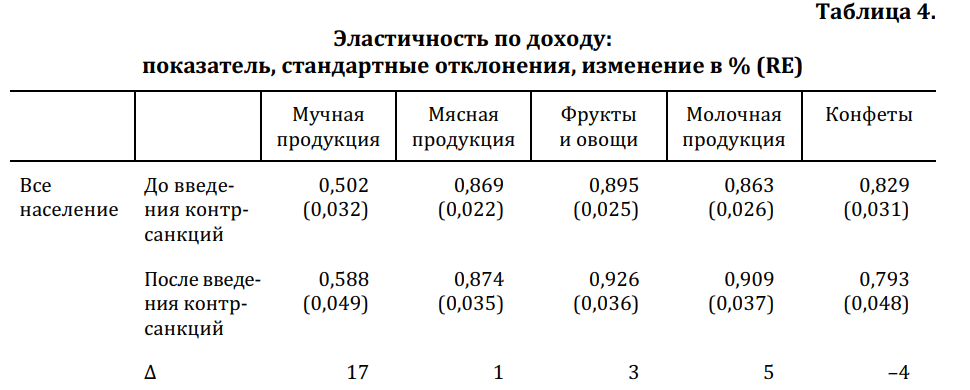

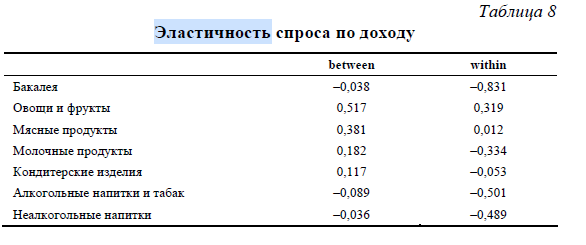

In [ ]:
FAST_HOUSEHOLDS_DFS[2021]['z_nfm']

In [ ]:
FAST_AIDS_matrix(2021)

In [ ]:
q1=FAST_AIDS_matrix(2021)
q1['Членов семьи']=FAST_HOUSEHOLDS_DFS[2021]['z_nfm']
q1

In [ ]:
q1['Членов семьи']=pd.Categorical(q1['Членов семьи'])

In [ ]:
q1['Остаток'].plot()

In [ ]:
q1['Членов семьи']

In [ ]:
def wrong_FAST_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto'):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year,price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#7
    #equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    
    
    
    if constrained==True:
        mod=SUR(equations)
        mod.add_constraints(r)
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

In [ ]:
wrong_FAST_AIDS(2021)

In [ ]:
FAST_AIDS(2021)

In [ ]:
FAST_AIDS(2021,constrained=1)

In [ ]:
cov = FAST_AIDS(2021).sigma
std = np.sqrt(np.diag(FAST_AIDS(2021).sigma)[:, None])
regions = [k for k in ['Бакалея','Овощи-фрукты','Мясо-рыба','Молоко','Кондитерские изделия','Алкоголь']]
corr = pd.DataFrame(cov / (std @ std.T), columns=regions, index=regions)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, vmax=0.8, square=True)
plt.show()

corr.style.format("{:0.3f}")

In [ ]:
cov = FAST_AIDS(2021, price_index='Laspeyres').sigma
std = np.sqrt(np.diag(FAST_AIDS(2021,price_index='Laspeyres').sigma)[:, None])
regions = [k for k in ['Бакалея','Овощи-фрукты','Мясо-рыба','Молоко','Кондитерские изделия','Алкоголь']]
corr = pd.DataFrame(cov / (std @ std.T), columns=regions, index=regions)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, vmax=0.8, square=True)
plt.show()

corr.style.format("{:0.3f}")

In [ ]:
FAST_AIDS(2012,fitted=True,cov_type_1="unadjusted",
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto')

In [ ]:
def FAST_dem_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto'):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year,price_index)
    final_df['Членов семьи']=FAST_HOUSEHOLDS_DFS[2021]['z_nfm']
    final_df['Членов семьи']=pd.Categorical(final_df['Членов семьи'])
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#7
    #equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    
    
    
    if constrained==True:
        mod=SUR(equations)
        mod.add_constraints(r)
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

In [ ]:
FAST_dem_AIDS(2021)

In [ ]:
FAST_AIDS(2021).resids.mean()

In [ ]:
FAST_AIDS(2021).resids.cov()

In [ ]:
FAST_AIDS_matrix(2021)

In [ ]:
FAST_AIDS_matrix(2021,add_index=True).columns=['const', 'Bakaleya', 
                                                     'Veggies_Fruits', 'Meat_Fish', 'Milk',
                                                     'Sweets', 'Alcohol', 'Beverages',
                                                     'P_Bakaleya', 'P_Veggies_Fruits', 'P_Meat_Fish',
                                                     'P_Milk', 'P_Sweets', 'P_Alcohol',
                                                     'P_Beverages', 'Остаток', 'Costs', 'P_index']

# Получение демографических переменных

In [ ]:
def cleaning_routine(dfvar_1,dfvar_2):
    bad_households1=[]
    for i in range(len(dfvar_1.columns)):
        ttt=dfvar_1.loc[dfvar_1.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households1=[*bad_households1,*list(ttt)]
    
    bad_households2=[]
    for i in range(len(dfvar_2.columns)):
        ttt=dfvar_2.loc[dfvar_2.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households2=[*bad_households2,*list(ttt)] 
            
    dfvar_1=dfvar_1.drop(list(set(bad_households1)|set(bad_households2))).copy()
    dfvar_1=dfvar_1.astype(str).replace('nan', '0').astype(float).copy()
    return dfvar_1

In [ ]:
qqq=FAST_HOUSEHOLDS_DFS[2021]["zf14"].copy(deep=1)
qqq

In [ ]:
qqq.cat.categories

In [ ]:
qqq[(qqq=='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ')]

In [ ]:
qqq[(qqq=='НЕТ ОТВЕТА')]

In [ ]:
qqq[(qqq=='ОТКАЗ ОТ ОТВЕТА')]

In [ ]:
set(list(qqq[(qqq==0)].index))

In [ ]:
cvb=set()
for i in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
          'НЕТ ОТВЕТА',
          ' НЕТ ОТВЕТА',
          ' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
          'НЕТ ОТВЕТА+E7898',
          'ОТКАЗ ОТ ОТВЕТА',
          'нет ответа',
         0]:
    cvb=cvb|set(list(qqq[(qqq==i)].index))
cvb

In [ ]:
(qqq[list(set(list(qqq.index))-(cvb))].astype(str).astype(float)*7/30).plot()

In [ ]:
qqq.drop

In [ ]:
FAST_wrong_AIDS_matrix(year,price_index='Stone')

In [ ]:
z_nfm Количество членов семьи

# Ограничение суммируемости вместо отбрасывания уравнения

In [ ]:
def FAST_sum_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto',homo=True, sym=True):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year,price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#7
    equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
                        'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    if constrained==True:
        if (homo==True) and (sym==True):
            mod=SUR(equations)
            mod.add_constraints(both_r)
        else:
            if homo==True:
                mod=SUR(equations)
                mod.add_constraints(homo_r)
            if sym==True:
                mod=SUR(equations)
                mod.add_constraints(sym_r)
        
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        mod.add_constraints(sum_r,q)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

In [ ]:
(FAST_AIDS_matrix(2021)<=0).sum()

In [ ]:
FAST_AIDS_matrix(2021)['Неалкогольные напитки']

In [ ]:
(FAST_AIDS_matrix(2021)['Неалкогольные напитки'].isna()).any()

In [ ]:
FAST_sum_AIDS(2021)

In [ ]:
r=0
r = pd.DataFrame(
    columns=FAST_sum_AIDS(1994,False).param_names,
    index=["rest{0}".format(i) for i in range(9)],
    dtype=np.float64)
r=r.fillna(0)
r.loc['rest0',['Бакалея_const', 'Овощи-фрукты_const','Молоко_const',
               'Мясо-рыба_const','Кондитерские изделия_const','Алкоголь_const',
               'Неалкогольные напитки_const']]=1

r.loc['rest1',['Бакалея_Остаток', 'Овощи-фрукты_Остаток','Молоко_Остаток',
               'Мясо-рыба_Остаток','Кондитерские изделия_Остаток','Неалкогольные напитки_Остаток']]=1

r.loc['rest2',['Бакалея_Цена на Бакалея',
              'Бакалея_Цена на Овощи-фрукты',
              'Бакалея_Цена на Молоко',
              'Бакалея_Цена на Мясо-рыба',
              'Бакалея_Цена на Кондитерские изделия',
              'Бакалея_Цена на Алкоголь',
                'Бакалея_Цена на Неалкогольные напитки']]=1

r.loc['rest3',['Овощи-фрукты_Цена на Бакалея',
              'Овощи-фрукты_Цена на Овощи-фрукты',
              'Овощи-фрукты_Цена на Молоко',
              'Овощи-фрукты_Цена на Мясо-рыба',
              'Овощи-фрукты_Цена на Кондитерские изделия',
              'Овощи-фрукты_Цена на Алкоголь',
                'Овощи-фрукты_Цена на Неалкогольные напитки']]=1

r.loc['rest4',['Молоко_Цена на Бакалея',
              'Молоко_Цена на Овощи-фрукты',
              'Молоко_Цена на Молоко',
              'Молоко_Цена на Мясо-рыба',
              'Молоко_Цена на Кондитерские изделия',
              'Молоко_Цена на Алкоголь',
                'Молоко_Цена на Неалкогольные напитки']]=1


r.loc['rest5',['Мясо-рыба_Цена на Бакалея',
              'Мясо-рыба_Цена на Овощи-фрукты',
              'Мясо-рыба_Цена на Молоко',
              'Мясо-рыба_Цена на Мясо-рыба',
              'Мясо-рыба_Цена на Кондитерские изделия',
              'Мясо-рыба_Цена на Алкоголь',
                'Мясо-рыба_Цена на Неалкогольные напитки']]=1

r.loc['rest6',['Кондитерские изделия_Цена на Бакалея',
              'Кондитерские изделия_Цена на Овощи-фрукты',
              'Кондитерские изделия_Цена на Молоко',
              'Кондитерские изделия_Цена на Мясо-рыба',
              'Кондитерские изделия_Цена на Кондитерские изделия',
              'Кондитерские изделия_Цена на Алкоголь',
                'Кондитерские изделия_Цена на Неалкогольные напитки']]=1

r.loc['rest7',['Алкоголь_Цена на Бакалея',
              'Алкоголь_Цена на Овощи-фрукты',
              'Алкоголь_Цена на Молоко',
              'Алкоголь_Цена на Мясо-рыба',
              'Алкоголь_Цена на Кондитерские изделия',
              'Алкоголь_Цена на Алкоголь',
                'Алкоголь_Цена на Неалкогольные напитки']]=1

r.loc['rest8',['Неалкогольные напитки_Цена на Бакалея',
              'Неалкогольные напитки_Цена на Овощи-фрукты',
              'Неалкогольные напитки_Цена на Молоко',
              'Неалкогольные напитки_Цена на Мясо-рыба',
              'Неалкогольные напитки_Цена на Кондитерские изделия',
              'Неалкогольные напитки_Цена на Алкоголь',
                'Неалкогольные напитки_Цена на Неалкогольные напитки']]=1


sum_r=r
sum_r

In [ ]:
sum_r.T

In [ ]:
q=pd.Series(data=[1,0,0,0,0,0,0,0,0],index=sum_r.index)

In [ ]:
q